<a href="https://colab.research.google.com/github/sayanghorui/samplecode/blob/master/practice_reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import reuters
import numpy as np

Using TensorFlow backend.


In [0]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [0]:
len(train_data)

8982

In [0]:
len(test_data)

2246

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_newswire

557056/550378 [==============================] - 0s 1us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


In [0]:
from keras import models
from keras import layers

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [0]:
history = model.fit(partial_x_train, partial_y_train, batch_size= 512, epochs= 20, validation_data= (x_val,y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 6s 716us/step - loss: 2.6760 - acc: 0.5113 - val_loss: 1.7834 - val_acc: 0.6370
Epoch 2/20
7982/7982 [==============================] - 1s 64us/step - loss: 1.4300 - acc: 0.7136 - val_loss: 1.2943 - val_acc: 0.7280
Epoch 3/20
7982/7982 [==============================] - 1s 65us/step - loss: 1.0342 - acc: 0.7868 - val_loss: 1.1218 - val_acc: 0.7760
Epoch 4/20
7982/7982 [==============================] - 1s 63us/step - loss: 0.8146 - acc: 0.8322 - val_loss: 1.0502 - val_acc: 0.7820
Epoch 5/20
7982/7982 [==============================] - 1s 67us/step - loss: 0.6509 - acc: 0.8663 - val_loss: 0.9823 - val_acc: 0.7930
Epoch 6/20
7982/7982 [==============================] - 0s 63us/step - loss: 0.5258 - acc: 0.8931 - val_loss: 0.9674 - val_acc: 0.7870
Epoch 7/20
7982/7982 [=================

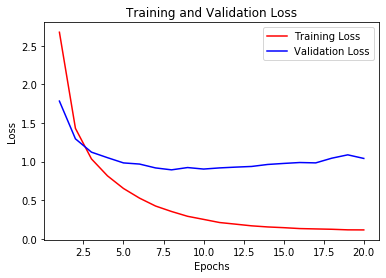

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

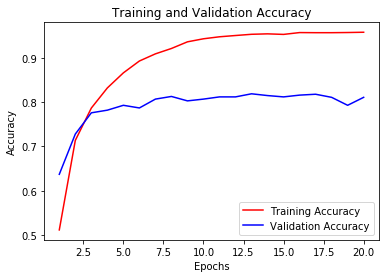

In [0]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
model1 = models.Sequential()

model1.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(46, activation='softmax'))

model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model1.fit(partial_x_train, partial_y_train, batch_size= 512, epochs= 8, validation_data= (x_val,y_val))
results = model1.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 99us/step - loss: 2.6335 - acc: 0.5192 - val_loss: 1.7449 - val_acc: 0.6340
Epoch 2/8
7982/7982 [==============================] - 1s 63us/step - loss: 1.4117 - acc: 0.7061 - val_loss: 1.2983 - val_acc: 0.7130
Epoch 3/8
7982/7982 [==============================] - 0s 62us/step - loss: 1.0388 - acc: 0.7754 - val_loss: 1.1188 - val_acc: 0.7580
Epoch 4/8
7982/7982 [==============================] - 1s 63us/step - loss: 0.8241 - acc: 0.8250 - val_loss: 1.0192 - val_acc: 0.7840
Epoch 5/8
7982/7982 [==============================] - 1s 64us/step - loss: 0.6566 - acc: 0.8623 - val_loss: 0.9616 - val_acc: 0.7890
Epoch 6/8
7982/7982 [==============================] - 1s 64us/step - loss: 0.5238 - acc: 0.8905 - val_loss: 0.9271 - val_acc: 0.8010
Epoch 7/8
7982/7982 [==============================] - 1s 65us/step - loss: 0.4217 - acc: 0.9142 - val_loss: 0.9168 - val_acc: 0.8010
Epoch 8/8
2246

In [0]:
predictions = model1.predict(x_test)

In [0]:
predictions[110]

array([7.8596377e-06, 2.5730242e-05, 8.8499505e-08, 1.2036156e-04,
       1.4573471e-03, 8.6589074e-07, 2.9441770e-07, 1.5857801e-06,
       4.5206887e-04, 3.6726604e-08, 1.6218027e-06, 3.2762739e-05,
       5.5641649e-05, 2.3688385e-04, 3.8386643e-05, 1.0029398e-07,
       1.9324760e-07, 5.4826014e-06, 1.3052893e-06, 9.9487656e-01,
       2.1374901e-03, 2.5832351e-05, 2.8391057e-06, 4.2537857e-05,
       1.5040439e-05, 1.2930434e-06, 6.8129509e-07, 2.5341862e-07,
       2.4138518e-07, 2.2243860e-06, 1.9653959e-05, 7.9459659e-07,
       1.0800268e-08, 2.1387755e-06, 8.5656502e-06, 2.5614156e-06,
       4.1966823e-06, 2.8330862e-07, 6.4833507e-08, 3.1199161e-05,
       3.8356471e-04, 2.2765216e-06, 2.8693646e-07, 2.4851920e-07,
       1.6639551e-07, 3.9957800e-07], dtype=float32)

In [0]:
np.argmax(predictions[110])

19